# IMDB Dataset

We have 50,000 records of IMDB(Internet Movie Database) reviews of which 25000 are positive reviews and 25000 are negative revies.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.0.0


# Loading Imbd dataset from the Internet
### Loading 10,000 most frequent words

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
print("These words are tokinize(Vectorized)")
print("mean every word has an index(number) against it")
print()
print("Words: ",train_data[0])
print()
print("Label: ",train_labels[0])
print("0 = negative review")
print("1 = positive review")

These words are tokinize(Vectorized)
mean every word has an index(number) against it

Words:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 10

In [4]:
# Downloading for checking words against indexes
word_index = imdb.get_word_index()
display(word_index)

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
# revercing word against key to key against word (dictionary)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
display(reverse_word_index)

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
# Checking words against train data 0
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_review)
print()
print("Label: ",train_labels[0])
print("0 = negative review")
print("1 = positive review")

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
print(type(train_data))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# total words in train data 25000
# maximum word of dictionary are 10,000
print(len(train_data))
print(max(train_data[24999]),": Doesn't exceed from 10,000")
print(max([max(sequence) for sequence in train_data]))

25000
9685 : Doesn't exceed from 10,000
9999


# Preparing Dataset

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [10]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train[0])
print(x_test[0])
print()
print(x_train.shape)
print(x_test.shape)

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]

(25000, 10000)
(25000, 10000)


In [12]:
# converting int to float
y_train = np.asarray(train_labels).astype("float32")
# or
y_test = test_labels.astype("float32")

In [13]:
print("train feature:",x_train.shape)
print("train labels :",y_train.shape)
print("test feature :",x_test.shape)
print("test labels  :",y_test.shape)

train feature: (25000, 10000)
train labels : (25000,)
test feature : (25000, 10000)
test labels  : (25000,)


In [14]:
input_shape = 10000

# First Model

In [15]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(64,activation="relu",input_shape=(input_shape,)),
                layers.Dense(32,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(1, activation='sigmoid')])

model.compile(optimizer="rmsprop", # adam
             loss="binary_crossentropy",
             metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=10,validation_split=(0.2))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 345us/sample - loss: 0.3378 - accuracy: 0.8561 - val_loss: 0.2862 - val_accuracy: 0.8848
Epoch 2/10
20000/20000 [==============================] - 5s 269us/sample - loss: 0.2012 - accuracy: 0.9230 - val_loss: 0.3286 - val_accuracy: 0.8814
Epoch 3/10
20000/20000 [==============================] - 5s 257us/sample - loss: 0.1516 - accuracy: 0.9445 - val_loss: 0.3474 - val_accuracy: 0.8850
Epoch 4/10
20000/20000 [==============================] - 6s 287us/sample - loss: 0.1085 - accuracy: 0.9632 - val_loss: 0.3824 - val_accuracy: 0.8854
Epoch 5/10
20000/20000 [==============================] - 7s 327us/sample - loss: 0.0709 - accuracy: 0.9779 - val_loss: 0.4675 - val_accuracy: 0.8772
Epoch 6/10
20000/20000 [==============================] - 5s 266us/sample - loss: 0.0421 - accuracy: 0.9882 - val_loss: 0.5314 - val_accuracy: 0.8802
Epoch 7/10
20000/20000 [===========================

In [16]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

25000/1 - 2s - loss: 1.0482 - accuracy: 0.8617

Loss:  170.60670989334582 %
Accuracy:  86.17200255393982 %


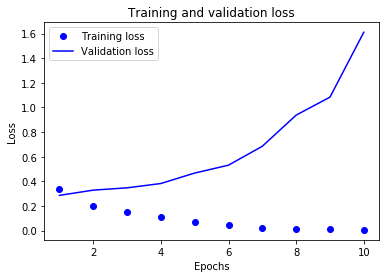

In [17]:
#Plotting the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

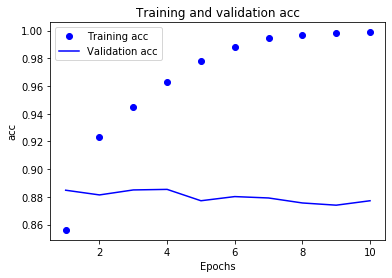

In [18]:
#Plotting the training and validation Avvuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Prediction

In [19]:
predict = 1212
print("0 = Negative Review")
print("1 = Positive Review")
print()
prediction = model.predict_classes(x_test[predict].reshape(10000,1).transpose())
print("Predicted: ",prediction)
print("Actual Label :",y_test[predict])
print()
#print("Actual text: ",test_texts.iloc[0][:50])
print()
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in test_data[predict][:50]])
print(decoded_review)

0 = Negative Review
1 = Positive Review

Predicted:  [[0]]
Actual Label : 0.0


? if this movie had a point i never discovered it a very depressing movie which supposedly is about the final ? of the residents living in a ? site area on the ? river in montana the problem is that there is no actual ? river in montana there


# Hyperperameter tuning

In [20]:
models = tf.keras.Sequential
layers = tf.keras.layers
    
def tuning(epochs,drop_ratio,batch_size):
    model1 = models([layers.Dense(16,activation="relu",input_shape=(input_shape,)),
                #layers.Dense(32,activation="relu"),
                layers.Dropout(drop_ratio),
                layers.Dense(16,activation="relu"),
                layers.Dense(1, activation='sigmoid')])

    model1.compile(optimizer="adam", # adam #rmsprop
             loss="binary_crossentropy", #binary_crossentropy
             metrics=["accuracy"])

    history = model1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=(0.2))
    
    evaluation = model1.evaluate(x_test,y_test,verbose=2)
    print()
    print("Loss: ",evaluation[0]*100,"%")
    print("Accuracy: ",evaluation[1]*100,"%")
    #return model1
    
        
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 4s 213us/sample - loss: 0.3349 - accuracy: 0.8591 - val_loss: 0.2803 - val_accuracy: 0.8876
Epoch 2/2
20000/20000 [==============================] - 3s 130us/sample - loss: 0.1795 - accuracy: 0.9319 - val_loss: 0.3139 - val_accuracy: 0.8822
25000/1 - 2s - loss: 0.3344 - accuracy: 0.8695

Loss:  33.64669946670532 %
Accuracy:  86.94800138473511 %


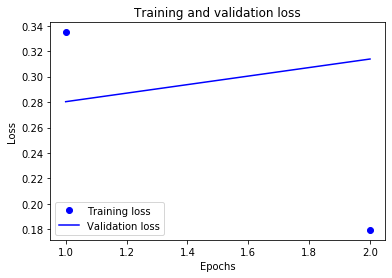

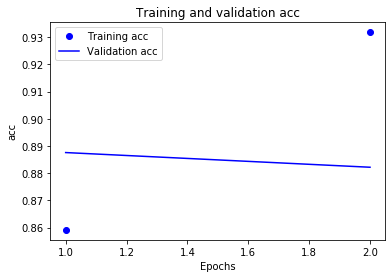

Test loss : 33.64669946670532 %
Test accuracy : 86.94800138473511 %


In [21]:
epochs = 2
drop_ratio = 0.005
batch_size = 32

tuning(epochs,drop_ratio,batch_size)